In [21]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, balanced_accuracy_score
from sklearn.preprocessing import LabelEncoder

In [22]:
# Reading all the three datasets
odi_df = pd.read_csv("virat_kohli_odi_innings_data.csv")
t20_df = pd.read_csv("virat_kohli_t20i_innings_data.csv")
test_df = pd.read_csv("virat_kohli_test_innings_data.csv")

In [23]:
odi_df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Odi No
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18/08/08,ODI # 2742
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20/08/08,ODI # 2745
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24/08/08,ODI # 2750
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27/08/08,ODI # 2755
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29/08/08,ODI # 2756


In [24]:
t20_df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,T20I No
0,26,30,21,3,1,123.8,5,not out,2,v Zimbabwe,Harare,12/06/10,T20I # 182
1,DNB,-,-,-,-,-,-,-,2,v Zimbabwe,Harare,13/06/10,T20I # 183
2,28,28,19,5,0,147.36,1,bowled,1,v South Africa,Durban,09/01/11,T20I # 196
3,14,15,12,2,0,116.66,3,caught,1,v West Indies,Port of Spain,04/06/11,T20I # 200
4,4,5,5,0,0,80,4,caught,1,v England,Manchester,31/08/11,T20I # 204


In [25]:
test_df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Test No
0,4,13,10,1,0,40,5,caught,1,v West Indies,Kingston,20/06/11,Test # 1997
1,15,72,54,2,0,27.77,5,caught,3,v West Indies,Kingston,20/06/11,Test # 1997
2,0,1,2,0,0,0,5,caught,1,v West Indies,Bridgetown,28/06/11,Test # 1998
3,27,118,107,1,1,25.23,5,caught,3,v West Indies,Bridgetown,28/06/11,Test # 1998
4,30,62,53,2,0,56.6,5,caught,2,v West Indies,Roseau,06/07/11,Test # 1999


In [26]:
# Converting 'Runs' and 'SR' to numeric, handling 'DNB' and 'TDNB' values
odi_df['Runs'] = pd.to_numeric(odi_df['Runs'], errors='coerce')
t20_df['Runs'] = pd.to_numeric(t20_df['Runs'], errors='coerce')
test_df['Runs'] = pd.to_numeric(test_df['Runs'], errors='coerce')

odi_df['SR'] = pd.to_numeric(odi_df['SR'], errors='coerce')
t20_df['SR'] = pd.to_numeric(t20_df['SR'], errors='coerce')
test_df['SR'] = pd.to_numeric(test_df['SR'], errors='coerce')

# Dropping rows with NaN values (i.e., "DNB" cases converted to NaN)
odi_df.dropna(subset=['Runs', 'SR'], inplace=True)
t20_df.dropna(subset=['Runs', 'SR'], inplace=True)
test_df.dropna(subset=['Runs', 'SR'], inplace=True)

In [27]:
# Concatenating runs, strike rate and grounds and storing into separate lists
runs = np.concatenate((odi_df['Runs'], t20_df['Runs'], test_df['Runs']))
sr = np.concatenate((odi_df['SR'], t20_df['SR'], test_df['SR']))
ground = np.concatenate((odi_df['Ground'], t20_df['Ground'], test_df['Ground']))

In [28]:
# Creating match type 
match_type = np.concatenate((
    np.repeat("ODI", len(odi_df['Runs'])),
    np.repeat("T20", len(t20_df['Runs'])),
    np.repeat("TEST", len(test_df['Runs']))
))

In [29]:
# Creating a final DataFrame with runs, sr, and match_type
data_cricketer = pd.DataFrame({'Runs': runs, 'SR': sr, 'Match_Type': match_type})
data_cricketer.head()

,Runs,SR,Match_Type
0,12.0,54.54,ODI
1,37.0,55.22,ODI
2,25.0,65.78,ODI
3,54.0,81.81,ODI
4,31.0,67.39,ODI


In [30]:
# Storing Runs and SR in X, Match_Type in Y
X = data_cricketer[['Runs', 'SR']] # Independent variables
Y = data_cricketer['Match_Type'] # Target variable

In [31]:
# Encoding match_type to numeric values
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)  # Convert to numbers

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [32]:
# Creating the SVC model with polynomial kernel and degree 6
model = SVC(kernel='poly', degree=6)

# Training the model on the training data
model.fit(X_train, Y_train)

# Making predictions
Y_pred = model.predict(X_test)

In [33]:
# Computing evaluation metrics
confusion_matrix = confusion_matrix(Y_test, Y_pred)
accuracy_score = accuracy_score(Y_test, Y_pred)
balanced_accuracy = balanced_accuracy_score(Y_test, Y_pred)

# Displaying the calculated values
accuracy_score, balanced_accuracy, confusion_matrix

(0.7375,
 0.718055747736113,
 array([[48,  2, 23],
        [13, 17,  3],
        [ 1,  0, 53]], dtype=int64))

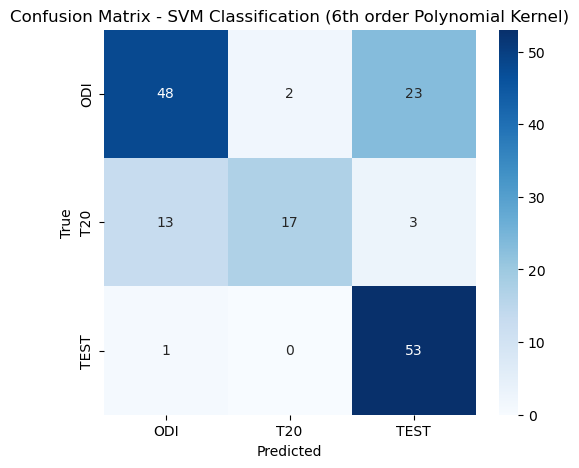

In [34]:
# Plotting confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - SVM Classification (6th order Polynomial Kernel)')
plt.show()

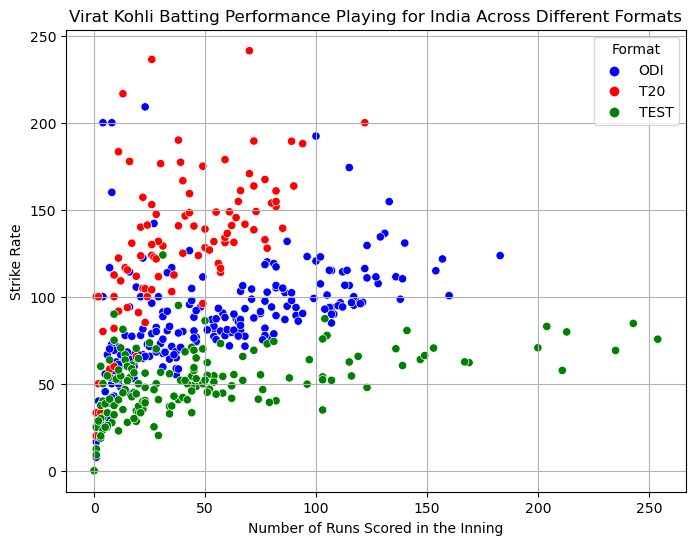

In [35]:
# Scatter plot for Runs vs Strike Rate with match type grouping
plt.figure(figsize=(8,6))
sns.scatterplot(x=data_cricketer['Runs'], y=data_cricketer['SR'], hue=data_cricketer['Match_Type'], palette=['blue', 'red', 'green'])
plt.xlabel('Number of Runs Scored in the Inning')
plt.ylabel('Strike Rate')
plt.title('Virat Kohli Batting Performance Playing for India Across Different Formats')
plt.legend(title='Format')
plt.grid()
plt.show()

## Report

### 1. What are Support Vectors in SVM? How do they help in making SVM less prone to outliers? 
Ans. Support Vectors in SVM are the boundary datapoints of a class which act as helpers in finding the best line/ hyperplane for segregating classes. These are the closest datapoints which are used to calculate the margin distance. They help in making SVM less prone to outliers by not considering the outliers for the decision-rule instead focusing only on the critical ones (support vectors).

### 2. What is the difference between a hard margin and a soft margin in SVM? 
Ans. Hard margin in SVM doesn't account for happening of any misclassfications whereas soft margin allows some misclassfications to happen. Soft margin can be useful in cases where the data is not linearly separable or when the margin is too small. 

### 3. How does SVM deal with non-linear classification boundaries? 
Ans. SVM solves the non-linear problems like non-linear classification by projecting data into higher dimensions using kernel which is a mathematical function for transforming data. The intuition is that the datapoints can always be mapped to a higher dimensional space where they are linearly separable. The transformation into a higher dimension makes it simpler to 
distinguish between classes and thus make better predictions.

### 4. What is the role of gamma in SVM? How does the value of gamma impact  underfitting/overfitting? 
Ans. Gamma in SVM defines how far (in terms of datapoints) influences the calculation of a plausible line/hyperplane of separation. Low gamma means that points far from a plausible line/hyperplane are considered for calculation. This would mean that the model is less complex, leading to underfitting as it does not capture the data structure well. High gamma means that points close to a plausible line/hyperplane are considered for calculation. This would mean that the model becomes more sensitive to training data, increasing the risk of overfitting.

### 5. How are SVMs used for multi-class classification problems?
Ans. Natively, SVM is a binary classifier but it still handles multi-classification using two techniques:
1) One-to-one Approach- Breaking down the multiclass classification problem into multiple binary classification problems. Then make a binary 
classifier for each pair of classes. In this approach, the number of classifiers for m classes are (m*(m-1))/2.
2) One-to-rest Approach- Breaking down to a binary classifier per class i.e., treating one class as positive and rest of the classes as negative.
In this approach, the number of classifiers for m classes are m.